# MNIST Database Classification

The MNIST database is a large database consisting of __labeled__ hand-written digits. There are __70000__ images each of __28 x 28__ pixels. The dataset can be downloaded using popular Deep Learning packages like _Tensorflow_ and _PYTorch_. So we don't need to upload the dataset separately into Kaggle or GitHub storage.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import InputLayer, Flatten, Rescaling, Dense, Dropout
from keras.callbacks import ModelCheckpoint

# check versions
!python --version
print(f"Tensorflow version: {tf.__version__}")

Python 3.7.12
Tensorflow version: 2.6.4


## Data Exploration

The data can be loaded into the session using `mnist.load_data()` which will output two tuples, one containing the __Training Data__ and the other containing __Testing Data__. Tensorflow will download the dataset from it's repositories and store it in the system's storage so that in the future it doesb't have to re-download the package again.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [3]:
# shape of data
print(f"Training Images: {X_train.shape}")
print(f"Training Labels: {y_train.shape} \n")
print(f"Testing Images: {X_test.shape}")
print(f"Training Labels: {y_test.shape}")

Training Images: (60000, 28, 28)
Training Labels: (60000,) 

Testing Images: (10000, 28, 28)
Training Labels: (10000,)


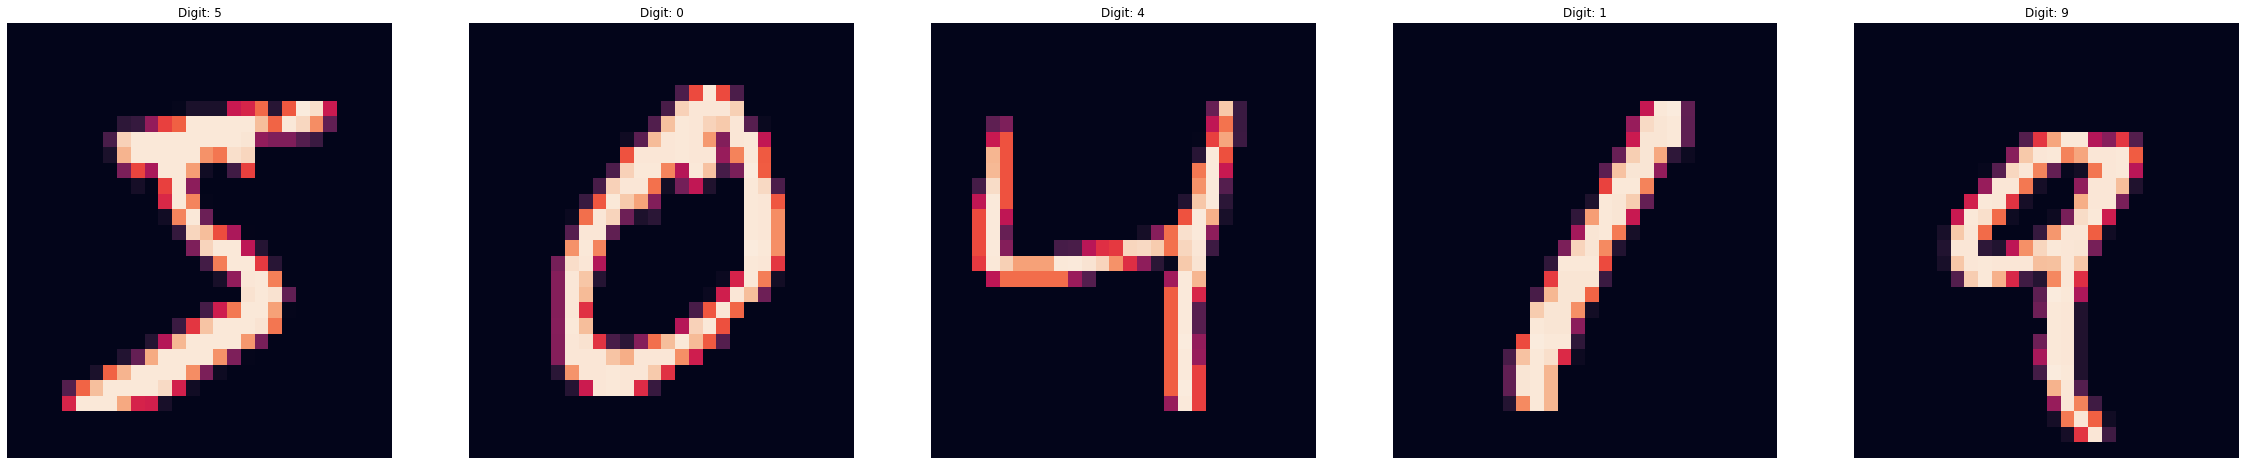

In [4]:
# visualize first 5 digits in training set
f, ax = plt.subplots(1, 5, figsize = (40, 8))
for i, label in enumerate(y_train[:5]):
    sns.heatmap(X_train[i], cbar = False, ax = ax[i])
    ax[i].set_title(f"Digit: {label}")
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

## Building the Model

For this notebook, we will be using a __Deep Neural Network__ model with _1000_ hidden layers and automatic rescaling of the inputs. This training does not require the use of any fancy accelerators like a __GPU__ or __TPU__ and can simply run on a CPU. Although a 4-core CPU with 8GB of RAM is recommended.

In [5]:
# architecture of the model
model = Sequential([
    # input layer specification
    InputLayer(input_shape = (28, 28)),
    # Data Scaling
    Rescaling(scale = 1. / 255),
    # Dense Layers
    Flatten(),
    Dense(units = (28 * 28), activation = 'relu'),
    Dropout(rate = 0.3),
    Dense(units = 1000, activation = 'relu'),
    Dropout(rate = 0.3),
    Dense(units = 10, activation = 'softmax')
])

# optimizer, loss function and performance metrics
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

2022-12-12 08:14:27.361272: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


## Training the Model

This is the fun part, where the model is trained with the data. Since we are dealing _1.4 million_ parameters and _60000_ images and labels, we cannot train the entire neural network using the entire dataset all at once and also a single run down of the entire dataset may not result in a proper trained model. Thus we to send the entire datasets multiple times and also in subsets.

+ __Batch__: When we split the training data into smaller datasets, each subset of the training data is called a _Batch_.
+ __Batch Size__: The number of training samples in a Batch is called it's _Batch Size_.
+ __Epoch__: The process of passing the once training dataset through the neural network, in one or more batches, along with the backpropagation of errors from the output layer is called an epoch.  

__Points to be Noted:__

1. The larger the batch size the more memory will be needed to complete a single epoch.
2. Choosing a small batch size will also result in more number of iterations per epoch since _Iterations per Epoch_ = _Total Training Samples_ / _Batch Size_. This can inadvertently increase the training time.
3. Choosing a large batch size also reduces the neural netorks abilility to generalize.

In [6]:
training_history = model.fit(X_train, y_train,
                           batch_size = 256,
                           epochs = 15,
                           validation_data = (X_test, y_test),
                           verbose = 0)

# evaluate training
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.5f}")
print(f"Test Accuracy: {100*acc:.2f} %")

2022-12-12 08:14:27.646073: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


313/313 [==============================] - 1s 3ms/step - loss: 0.0679 - accuracy: 0.9834
Test Loss: 0.06789
Test Accuracy: 98.34 %


## Learning Curve

The __Learning Curve__ is used to visualize the progression of Training Loss/Accuracy and Validation Loss/Accuracy with every epoch. This visual tool is quite useful to detect Overfitting and overall speed of learning.

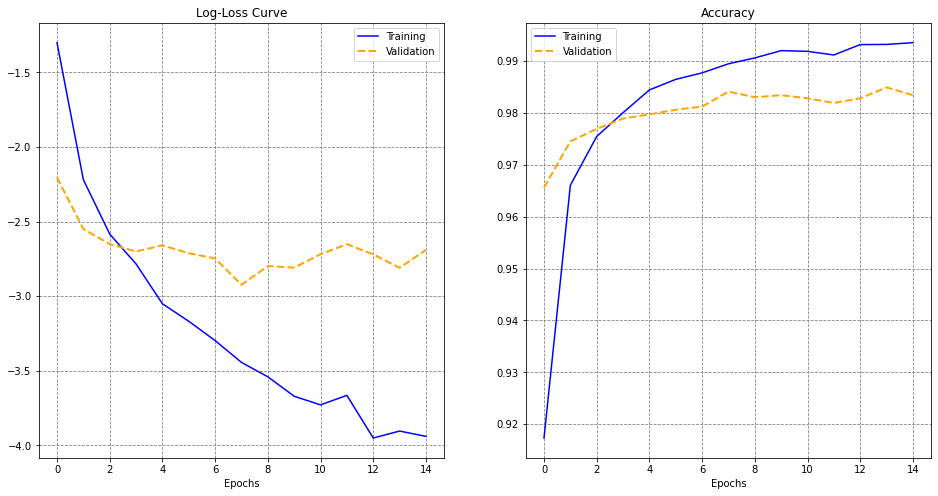

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 8))
# plot training log-loss
ax1.plot(np.log(training_history.history['loss']), label = 'Training', color = 'blue', linestyle = 'solid')
ax1.set_title('Log-Loss Curve')
ax1.set_xlabel('Epochs')
ax1.grid(color = 'grey', linestyle = 'dashed')

# plot training accuracy
ax2.plot(training_history.history['accuracy'], label = 'Training', color = 'blue', linestyle = 'solid')
ax2.set_title('Accuracy')
ax2.set_xlabel('Epochs')
ax2.grid(color = 'grey', linestyle = 'dashed')

# Validation Log-Loss
ax1.plot(np.log(training_history.history['val_loss']), label = 'Validation', color = 'orange', linestyle = 'dashed', linewidth = 2)

# Validation Accuracy
ax2.plot(training_history.history['val_accuracy'], label = 'Validation', color = 'orange', linestyle = 'dashed', linewidth = 2)

ax1.legend()
ax2.legend()
plt.show()

## Conclusion

1. We have achieved an Accuracy rate of $98.17$% on the Testing dataset which is close to the $98.4$% maximum accuracy achieved using a similar model.
2. Our neural netork starts to overfit after the 10th epoch and so the training should be done using only 10 epochs.

# References

1. [Effect of batch size on training dynamics - Medium](https://medium.com/mini-distill/effect-of-batch-size-on-training-dynamics-21c14f7a716e)
2. [Learning Curve - Wikipedia](https://en.wikipedia.org/wiki/Learning_curve_(machine_learning))
3. [MNIST Dataset - Wikipedia](https://en.wikipedia.org/wiki/MNIST_database)